In [118]:
import warnings 
warnings.filterwarnings('ignore')

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Books Dataset

In [120]:
books = pd.read_csv('Books.csv', encoding='latin1')

In [121]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [122]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [123]:
books.columns = books.columns.str.lower()

In [124]:
books.columns = books.columns.str.replace('-','_')

In [125]:
books.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l'],
      dtype='object')

In [126]:
books.shape

(135394, 8)

In [127]:
books.duplicated().value_counts()

False    135394
Name: count, dtype: int64

In [128]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64

In [129]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135394 entries, 0 to 135393
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 135394 non-null  object
 1   book_title           135394 non-null  object
 2   book_author          135393 non-null  object
 3   year_of_publication  135394 non-null  int64 
 4   publisher            135392 non-null  object
 5   image_url_s          135394 non-null  object
 6   image_url_m          135394 non-null  object
 7   image_url_l          135394 non-null  object
dtypes: int64(1), object(7)
memory usage: 8.3+ MB


In [130]:
books.nunique()

isbn                   135394
book_title             122413
book_author             54920
year_of_publication        97
publisher                9935
image_url_s            135300
image_url_m            135300
image_url_l            135300
dtype: int64

In [131]:
books['year_of_publication'].dtype

dtype('int64')

In [132]:
books['year_of_publication_numeric'] = pd.to_numeric(books['year_of_publication'], errors='coerce')

In [133]:
error_books_rows = books[books['year_of_publication_numeric'].isna()]
error_books_rows

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,year_of_publication_numeric


In [134]:
split_titles = error_books_rows['book_title'].str.split(r';', expand=True)
split_titles

""


In [135]:
def shift_data(row):
    if not row['year_of_publication'].isdigit():
        row['image_url_l'] = row['image_url_m']
        row['image_url_m'] = row['image_url_s']
        row['image_url_s'] = row['publisher']
        row['publisher'] = row['year_of_publication']
        row['year_of_publication'] = row['book_author']
        row['book_author'] = row['book_title'].split(';')[1].strip().strip('"')
        row['book_title'] = row['book_title'].split(';')[0]
    return row

In [136]:
books_corrected = error_books_rows.apply(shift_data, axis=1)
books_corrected

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,year_of_publication_numeric


In [137]:
books.update(books_corrected)

In [138]:
books[books['isbn'] == '078946697X']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,year_of_publication_numeric


In [139]:
books.drop('year_of_publication_numeric',axis=1,inplace=True)

In [140]:
books['year_of_publication'] = books['year_of_publication'].astype(int)

In [141]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication     int32
publisher              object
image_url_s            object
image_url_m            object
image_url_l            object
dtype: object

In [142]:
books['year_of_publication'].describe()

count    135394.000000
mean       1959.011588
std         263.226268
min           0.000000
25%        1990.000000
50%        1996.000000
75%        2000.000000
max        2050.000000
Name: year_of_publication, dtype: float64

In [143]:
unique_years = books['year_of_publication'].unique()
np.sort(unique_years)

array([   0, 1900, 1902, 1904, 1910, 1911, 1914, 1920, 1921, 1923, 1924,
       1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2011, 2020, 2026, 2030, 2038, 2050])

In [144]:
most_frequent_year = books['year_of_publication'].mode()[0]
most_frequent_year

2002

In [145]:
books['year_of_publication'].value_counts()

year_of_publication
2002    9799
2001    9505
2000    8972
1999    8903
2003    8471
        ... 
1927       1
1928       1
1904       1
2011       1
1944       1
Name: count, Length: 97, dtype: int64

In [146]:
books.loc[(books['year_of_publication'] < 1800) | (books['year_of_publication'] > 2024), 'year_of_publication'] = most_frequent_year

In [147]:
unique_years = books['year_of_publication'].unique()
np.sort(unique_years)

array([1900, 1902, 1904, 1910, 1911, 1914, 1920, 1921, 1923, 1924, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2011, 2020])

In [148]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64

In [149]:
books.loc[books.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [150]:
books.publisher.fillna('other',inplace=True)

In [151]:
books.loc[books.book_author.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...


In [152]:
books.book_author.fillna('other',inplace=True)

In [153]:
books.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64

#### Top 10 Authors with Most Written Books

Text(0.5, 1.0, 'Top 10 Authors')

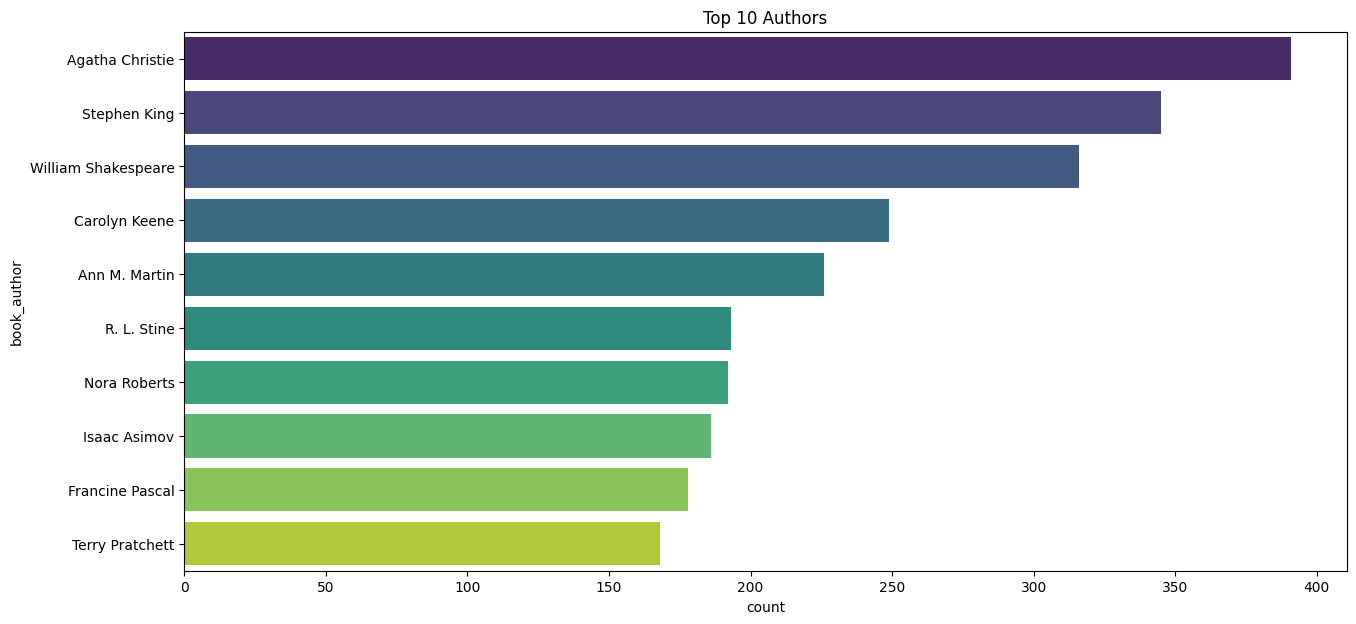

In [154]:
plt.figure(figsize=(15,7))
sns.countplot(y='book_author',data=books,order=pd.value_counts(books['book_author']).iloc[:10].index,palette='viridis')
plt.title('Top 10 Authors')

#### Top 10 Publishers with Most Books Published

Text(0.5, 1.0, 'Top 10 Publishers')

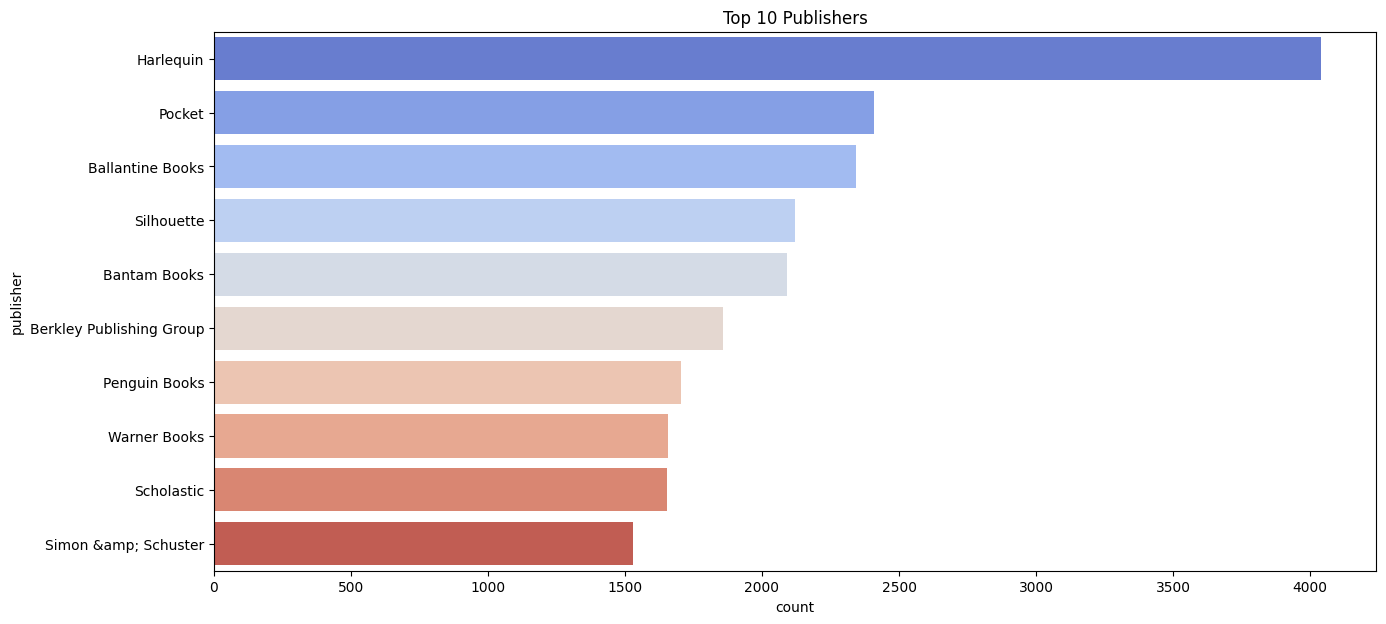

In [155]:
plt.figure(figsize=(15,7))
sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:10].index,palette='coolwarm')
plt.title('Top 10 Publishers')

#### Year wise Publications

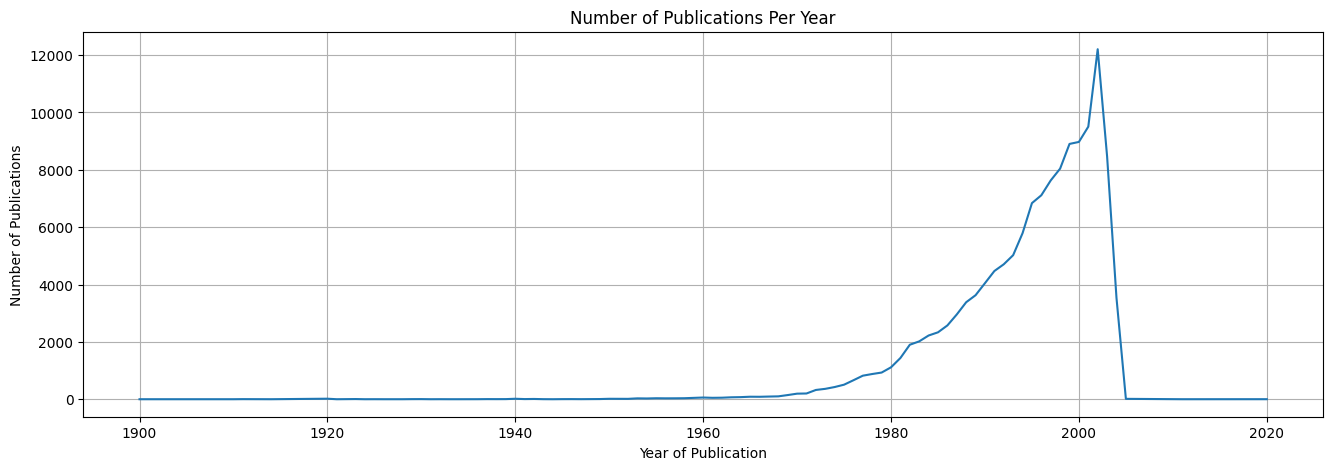

In [156]:
publication_counts = books['year_of_publication'].value_counts().sort_index()
plt.figure(figsize=(16, 5))
plt.plot(publication_counts.index, publication_counts.values)
plt.title('Number of Publications Per Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.show()

#### 2 . Users Dataset

In [157]:
users = pd.read_csv('Users.csv', encoding='latin1')

In [158]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [159]:
users.shape

(278858, 3)

In [160]:
users.duplicated().value_counts()

False    278858
Name: count, dtype: int64

In [161]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [162]:
users.columns = users.columns.str.lower()

In [163]:
users.columns = users.columns.str.replace('-','_')

In [164]:
users.columns

Index(['user_id', 'location', 'age'], dtype='object')

In [165]:
users.nunique()

user_id     278858
location     57339
age            165
dtype: int64

In [166]:
users.location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [167]:
users['country']=users.location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')   

In [168]:
users.head()

,user_id,location,age,country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,united kingdom


In [169]:
users.country.nunique()

529

In [170]:
users.isnull().sum()

user_id          0
location         0
age         110762
country        368
dtype: int64

In [171]:
users['country']=users['country'].astype('str')

In [172]:
a=list(users.country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [173]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [174]:
users.sample(5)

,user_id,location,age,country
260231,260232,"fulda, hessen, germany",44.0,germany
25613,25614,"plymtree, devon, united kingdom",NaN,united kingdom
144371,144372,"coquitlam, british columbia, canada",NaN,canada
145411,145412,"parsippany, new jersey, usa",60.0,usa
198689,198690,"aurora, colorado, usa",28.0,usa


Text(0.5, 1.0, 'Country wise Users')

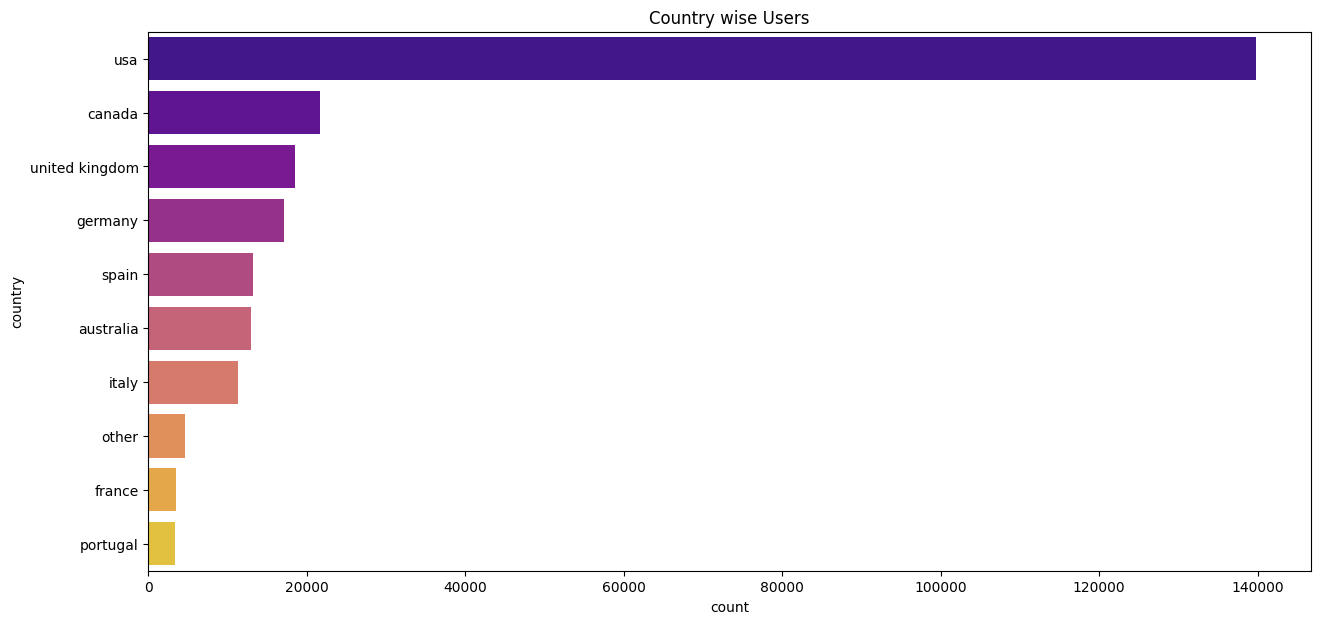

In [175]:
plt.figure(figsize=(15,7))
sns.countplot(y='country',data=users,order=pd.value_counts(users['country']).iloc[:10].index ,palette='plasma')
plt.title('Country wise Users')

In [176]:
users.isnull().sum()

user_id          0
location         0
age         110762
country          0
dtype: int64

In [177]:
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

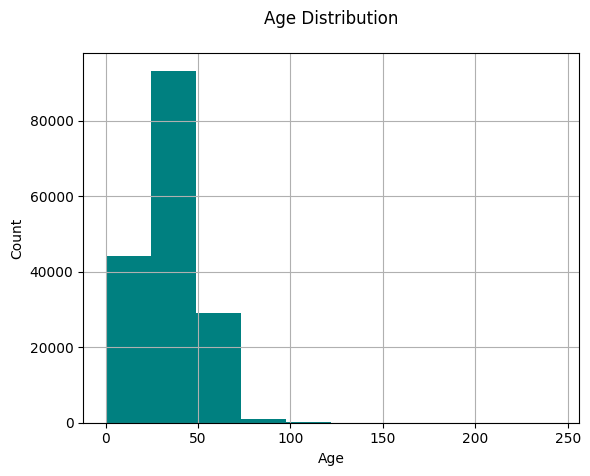

In [178]:
users.age.hist(color='teal')
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

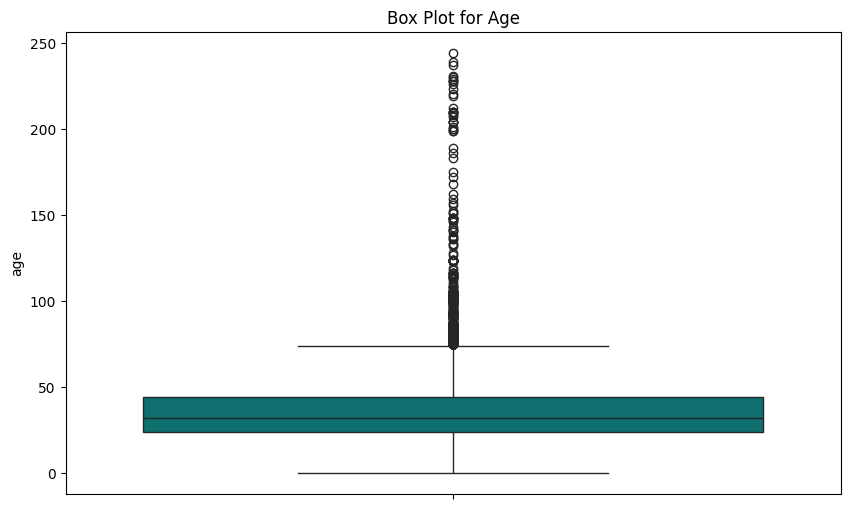

In [179]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='age', data=users, color='teal')
plt.title('Box Plot for Age')
plt.show()

In [180]:
users.loc[(users.age > 105) | (users.age < 5), 'age'] = np.nan

In [181]:
users.isnull().sum()

user_id          0
location         0
age         111750
country          0
dtype: int64

In [182]:
users['age'] = users['age'].fillna(users.groupby('country')['age'].transform('median'))

In [183]:
users.isnull().sum()

user_id       0
location      0
age         276
country       0
dtype: int64

In [184]:
users['age'].fillna(users.age.mean(),inplace=True)

In [185]:
users.isna().sum()

user_id     0
location    0
age         0
country     0
dtype: int64

In [186]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       278858 non-null  float64
 3   country   278858 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 8.5+ MB


#### 3. Ratings Dataset

In [187]:
ratings = pd.read_csv('Ratings.csv', encoding='latin1')

In [188]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [189]:
ratings.shape

(722126, 3)

In [190]:
ratings.duplicated().value_counts()

False    722126
Name: count, dtype: int64

In [191]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    1
dtype: int64

In [192]:
ratings.columns = ratings.columns.str.lower()

In [193]:
ratings.columns = ratings.columns.str.replace('-','_')

In [194]:
ratings.columns

Index(['user_id', 'isbn', 'book_rating'], dtype='object')

In [195]:
ratings.nunique()

user_id         66774
isbn           255687
book_rating        11
dtype: int64

In [196]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722126 entries, 0 to 722125
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      722126 non-null  int64  
 1   isbn         722126 non-null  object 
 2   book_rating  722125 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.5+ MB


In [197]:
print(ratings['book_rating'].describe())

count    722125.000000
mean          2.979396
std           3.890986
min           0.000000
25%           0.000000
50%           0.000000
75%           7.000000
max          10.000000
Name: book_rating, dtype: float64


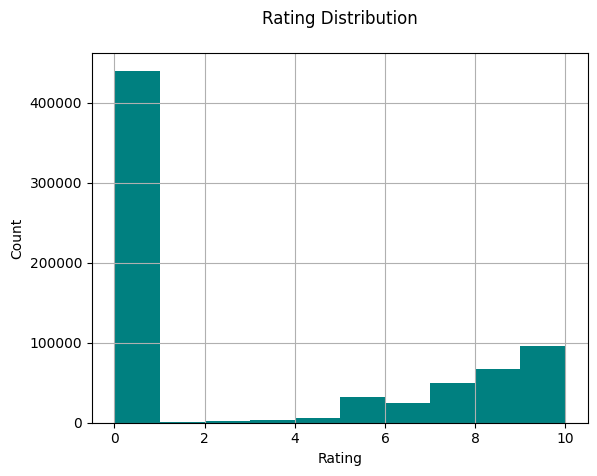

In [198]:
ratings.book_rating.hist(color='teal')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0. Hence segragating implicit and explict ratings datasets. 

In [199]:
ratings_explicit = ratings[ratings['book_rating'] != 0]
ratings_implicit = ratings[ratings['book_rating'] == 0]

In [200]:
print('Ratings Explicit Dataset Shape',ratings_explicit.shape)
print('Ratings Implicit Dataset Shape',ratings_implicit.shape)

Ratings Explicit Dataset Shape (282341, 3)
Ratings Implicit Dataset Shape (439785, 3)


<Axes: xlabel='book_rating', ylabel='count'>

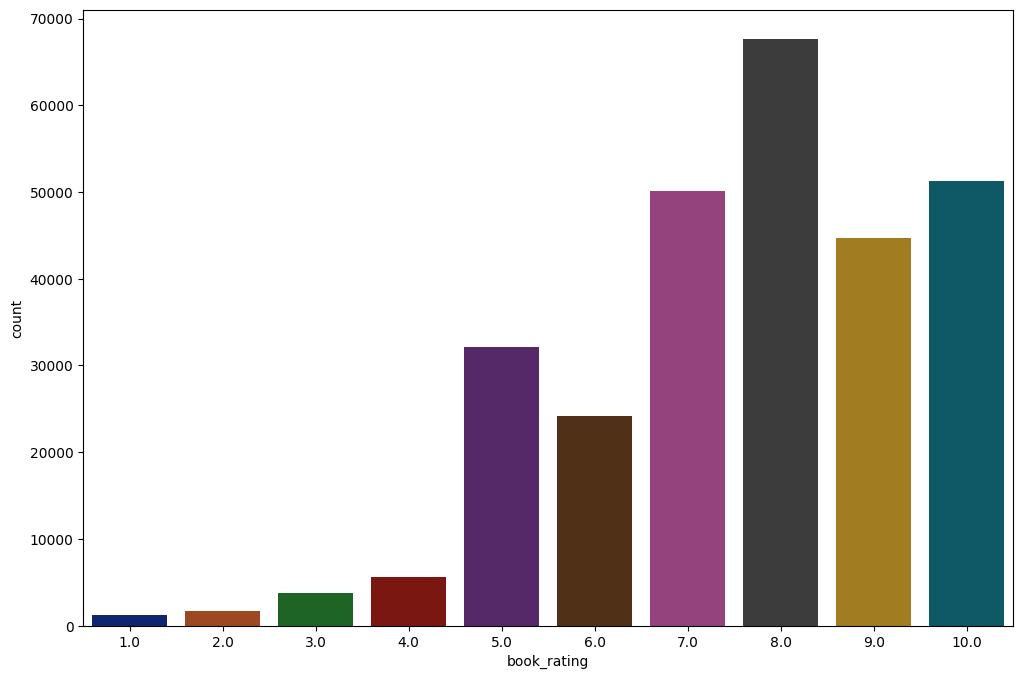

In [201]:
plt.figure(figsize=(12, 8))
sns.countplot(data=ratings_explicit , x='book_rating', palette='dark')

In [202]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [203]:
ratings_with_name = ratings.merge(books,on='isbn')
num_rating_df = ratings_with_name.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns={'book_rating':'num_ratings'},inplace=True)
num_rating_df

,book_title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Beyond IBM: Leadership Marketing and Finance ...,1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,3
4,Final Fantasy Anthology: Official Strategy Gu...,4
...,...,...
109035,Ã?Ã?ber die Regierung.,1
109036,Ã?Ã?bermorgen.,1
109037,Ã?Ã?rger mit Produkt X. Roman.,3
109038,Ã?Ã?stlich der Berge.,1


In [204]:
ratings_with_name['book_rating']

0         0.0
1         0.0
2         0.0
3         7.0
4         0.0
         ... 
537542    0.0
537543    0.0
537544    0.0
537545    0.0
537546    9.0
Name: book_rating, Length: 537547, dtype: float64

In [205]:
avg_rating_df = ratings_with_name.groupby('book_title')['book_rating'].mean().reset_index() # Calculate Average Rating 
avg_rating_df.rename(columns={'book_rating':'avg_rating'},inplace=True)
avg_rating_df

,book_title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,0.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,8.666667
4,Final Fantasy Anthology: Official Strategy Gu...,5.000000
...,...,...
109035,Ã?Ã?ber die Regierung.,0.000000
109036,Ã?Ã?bermorgen.,0.000000
109037,Ã?Ã?rger mit Produkt X. Roman.,4.666667
109038,Ã?Ã?stlich der Berge.,8.000000


In [206]:
popular_df=num_rating_df.merge(avg_rating_df, on='book_title')
popular_df

,book_title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,3,8.666667
4,Final Fantasy Anthology: Official Strategy Gu...,4,5.000000
...,...,...,...
109035,Ã?Ã?ber die Regierung.,1,0.000000
109036,Ã?Ã?bermorgen.,1,0.000000
109037,Ã?Ã?rger mit Produkt X. Roman.,3,4.666667
109038,Ã?Ã?stlich der Berge.,1,8.000000


In [207]:
popular_df=popular_df[popular_df['num_ratings']>=200].sort_values('avg_rating',ascending=False).head(30)

In [208]:
popular_df

,book_title,num_ratings,avg_rating
36217,Harry Potter and the Goblet of Fire (Book 4),222,5.729730
36220,Harry Potter and the Order of the Phoenix (Boo...,208,5.557692
36225,Harry Potter and the Prisoner of Azkaban (Book 3),266,5.511278
36210,Harry Potter and the Chamber of Secrets (Book 2),361,5.146814
36233,Harry Potter and the Sorcerer's Stone (Harry P...,361,4.963989
84373,The Fellowship of the Ring (The Lord of the Ri...,240,4.800000
99533,To Kill a Mockingbird,321,4.691589
93572,The Secret Life of Bees,503,4.614314
81148,The Catcher in the Rye,260,4.603846
84634,The Five People You Meet in Heaven,282,4.595745


In [209]:
books.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l'],
      dtype='object')

In [210]:
popular_df=popular_df.merge(books,on='book_title').drop_duplicates('book_title')[['book_title','book_author','image_url_m','num_ratings','avg_rating']]  # we Remove Duplicate name of books which was diffrent ISBN number 

In [211]:
popular_df

,book_title,book_author,image_url_m,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,222,5.729730
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,208,5.557692
5,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,266,5.511278
8,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,361,5.146814
11,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,361,4.963989
13,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,240,4.800000
19,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,321,4.691589
25,The Secret Life of Bees,Sue Monk Kidd,http://images.amazon.com/images/P/0142001740.0...,503,4.614314
29,The Catcher in the Rye,J.D. Salinger,http://images.amazon.com/images/P/0316769487.0...,260,4.603846
35,The Five People You Meet in Heaven,Mitch Albom,http://images.amazon.com/images/P/0786868716.0...,282,4.595745


In [234]:
popular_df

TypeError: 'DataFrame' object is not callable

#### 2 . Collabrative Flitering 

In [213]:
ratings_with_name

,user_id,isbn,book_rating,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276727,0446520802,0.0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,276733,2080674722,0.0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...,http://images.amazon.com/images/P/2080674722.0...
3,276744,038550120X,7.0,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
4,276746,0425115801,0.0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
...,...,...,...,...,...,...,...,...,...,...
537542,174699,006101351X,0.0,The Perfect Storm : A True Story of Men Agains...,Sebastian Junger,1998,HarperTorch,http://images.amazon.com/images/P/006101351X.0...,http://images.amazon.com/images/P/006101351X.0...,http://images.amazon.com/images/P/006101351X.0...
537543,174699,0684848813,0.0,Burn Rate : How I Survived the Gold Rush Years...,Michael Wolff,1998,Simon &amp; Schuster,http://images.amazon.com/images/P/0684848813.0...,http://images.amazon.com/images/P/0684848813.0...,http://images.amazon.com/images/P/0684848813.0...
537544,174700,0061091790,0.0,After All These Years,Susan Isaacs,1994,HarperTorch,http://images.amazon.com/images/P/0061091790.0...,http://images.amazon.com/images/P/0061091790.0...,http://images.amazon.com/images/P/0061091790.0...
537545,174700,0156007754,0.0,Blindness (Harvest Book),Jose Saramago,1999,Harvest Books,http://images.amazon.com/images/P/0156007754.0...,http://images.amazon.com/images/P/0156007754.0...,http://images.amazon.com/images/P/0156007754.0...


In [214]:
x = ratings_with_name.groupby('user_id').count()['book_rating'] > 200
most_users = x[x].index
most_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       171118, 172030, 172512, 172742, 173291, 173415, 174216, 174304, 277427,
       278418],
      dtype='int64', name='user_id', length=401)

In [215]:
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(most_users)]

In [216]:
y = filtered_rating.groupby('book_title').count()['book_rating']>=50
famous_books = y[y].index
famous_books

Index(['1st to Die: A Novel', '2nd Chance', 'A Bend in the Road',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Map of the World', 'A Painted House', 'A Prayer for Owen Meany',
       'A Thousand Acres (Ballantine Reader's Circle)', 'A Time to Kill',
       'A Walk to Remember',
       ...
       'When the Wind Blows',
       'Where the Heart Is (Oprah's Book Club (Paperback))',
       'While I Was Gone', 'Whispers', 'White Oleander : A Novel',
       'White Oleander : A Novel (Oprah's Book Club)',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Wild Animus', 'Wish You Well', '\O\" Is for Outlaw"'],
      dtype='object', name='book_title', length=224)

In [217]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [218]:
pt = final_ratings.pivot_table(index='book_title',columns='user_id',values='book_rating')
pt.head()

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,171118,172030,172512,172742,173291,173415,174216,174304,277427,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
A Map of the World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
pt.fillna(0,inplace=True)
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,171118,172030,172512,172742,173291,173415,174216,174304,277427,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Is for Alibi (Kinsey Millhone Mysteries (Paperback)),0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Map of the World,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
from sklearn.metrics.pairwise import cosine_similarity

In [221]:
similarity_scores = cosine_similarity(pt)

In [222]:
similarity_scores.shape

(224, 224)

In [224]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['image_url_m'].values))
        data.append(item)
    return data

In [225]:
recommend('Lightning')

[['Dolores Claiborne',
  'Stephen King',
  'http://images.amazon.com/images/P/0451177096.01.MZZZZZZZ.jpg'],
 ['Hideaway',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/042513525X.01.MZZZZZZZ.jpg'],
 ['The Tommyknockers',
  'Stephen King',
  'http://images.amazon.com/images/P/0451156609.01.MZZZZZZZ.jpg'],
 ['1st to Die: A Novel',
  'James Patterson',
  'http://images.amazon.com/images/P/0446610038.01.MZZZZZZZ.jpg']]

In [226]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity_scores,open('similarity.pkl','wb'))